In [2]:
import pandas
import pickle
import numpy as np

attributes = pickle.load(open( "../../pickle/image_attributes_processed.pkl", "rb" ))



In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

train, test = train_test_split(attributes, test_size=0.2)

# for i in [(1,), (15,), (30,), (60,), (30,60), (30,60,15)]:
#     mlp = MLPRegressor(hidden_layer_sizes=i, max_iter=300, learning_rate='adaptive')
#     mlp.fit(train[train.columns.difference(['id', 'score'])], train['score'])
#     y_pred = mlp.predict(test[test.columns.difference(['id', 'score'])])

#     mse = mean_squared_error(y_pred, test['score'])
#     rmse = np.sqrt(mse)
#     print(rmse)
    
mlp = MLPRegressor(hidden_layer_sizes=(30,60), max_iter=300, learning_rate='adaptive')
mlp.fit(train[train.columns.difference(['id', 'score'])], train['score'])
y_pred = mlp.predict(test[test.columns.difference(['id', 'score'])])

mse = mean_squared_error(y_pred, test['score'])
rmse = np.sqrt(mse)
print(rmse)

c:\program files\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


9507.990888446


c:\program files\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


9478.687859134265


c:\program files\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


9461.939602573175


c:\program files\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


9394.355737252425
9298.149069552399
9316.444927997034


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(attributes[attributes.columns.difference(['id', 'score'])])
components = pca.transform(attributes[attributes.columns.difference(['id', 'score'])])

[[-82.45944082  95.79398681 -72.40531138 ...  99.01236976  89.90016726
    2.48380624]
 [  2.26443435   1.14160257   2.56808532 ...   7.86602886   0.38797014
   -0.78928838]]


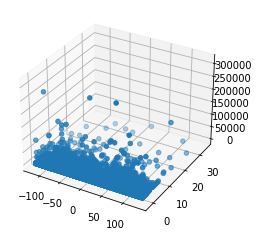

In [23]:
import matplotlib.pyplot as plt

print(components.T)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(components.T[0], components.T[1], attributes['score'])
plt.show()